<h1 style="background-color:#C2B4B9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 5px 5px;"><strong><centre>Motion Activity Classification Using Recurrent Neural Networks </centre></strong></h1>

<h2 style="background-color:#C2B4B9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 5px 5px;"><strong><centre>Methodology: Transforming and Splitting the Data</centre></strong></h2>

#### 02. Data Preprocessing <a class="anchor" id="data"></a>
##### Effective data transformation and splitting strategies are critical for building robust deep learning models. This section will cover data normalization, target encoding, and splitting the dataset into training, validation, and test sets.

---

# **Pré-processamento dos Dados**

## **Carregamento das Bibliotecas Base**

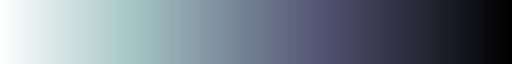

In [34]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
sns.color_palette("bone_r", as_cmap=True)

## **Carregamento do *Dataset***

In [35]:
# Definir o caminho do arquivo relativo ao diretório do script
#file_path = os.path.join(os.getcwd(), 'RNN_dataset', 'concatDataset.csv')

In [36]:
base_dir = r'C:\\Users\\maria\\OneDrive - Instituto Superior de Engenharia do Porto\\Desktop\\Semestre\\APROF\\mei-approf\\RNN\\datasets'
file_name = 'concatDataset.csv'

file_path = os.path.join(base_dir, file_name)
print(file_path)

C:\\Users\\maria\\OneDrive - Instituto Superior de Engenharia do Porto\\Desktop\\Semestre\\APROF\\mei-approf\\RNN\\datasets\concatDataset.csv


+ Leitura do ficheiro .csv com os dados das atividades utilizando o método `read_csv()`

In [37]:
df_motionSense = pd.read_csv(file_path)

+ Utilização do método `head()` para visualizar os 5 primeiros valores do Dataframe 'df_motionSense'

In [38]:
df_motionSense.head(5)

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,subject_id,session_id,category,age,gender,height,weight
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,1,1,dws,46,1,188,102
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,1,1,dws,46,1,188,102
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,1,1,dws,46,1,188,102
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,1,1,dws,46,1,188,102
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,1,1,dws,46,1,188,102


## **Remoção de Colunas Consideradas Desnecessárias**

Criação de um cópia do DataFrame inicial 'df_motionSense'e remoção de um conjunto de colunas:'Unnamed: 0', 'subject_id', 'session_id', 'age', 'gender', 'height', e 'weight' para simplificar o *dataset* para análise futura.

A remoção das colunas teve por base as seguintes justificações: 

+ **'Unnamed: 0':** Esta coluna diz respeito a um índice, pelo que se considerou que a sua remoção não teria impacto as informações relevantes dos dados;

+ **'subject_id':** Uma vez que não se está a fazer previsões com bases nas características individuais dos participantes, como idade, gênero, altura e peso, removeu-se esta coluna para evita a inclusão de informações irrelevantes no modelo;

+ **'session_id':** Similar à 'subject_id', considerou-se que a remoção desta coluna evitaria que o modelo fosse influenciado por detalhes específicos das diferentes sessões experimentais;

+ **'age', 'gender', 'height', 'weight':** Estas colunas contêm informações pessoais sobre os participantes envolvidos no estudo, como idade, gênero, altura e peso. Considerou-se assim que estas características não são relevantes para o problema em questão, uma vez que o objetivo é prever atividades com base em dados sensoriais e não pessoais. Assim sendo, a sua remoção simplificaria o *dataset*;

Portanto, a eliminação destas colunas ajuda a focar no problema de classificação de atividades de movimento com base apenas nos dados sensoriais, sem considerar características individuais dos participantes ou detalhes das sessões experimentais.

In [39]:
df_motionSense_copy = df_motionSense.copy() 

df_motionSense_copy.drop('Unnamed: 0', axis=1, inplace=True)
df_motionSense_copy.drop('subject_id', axis=1, inplace=True)
df_motionSense_copy.drop('session_id', axis=1, inplace=True)
df_motionSense_copy.drop('age', axis=1, inplace=True)
df_motionSense_copy.drop('gender', axis=1, inplace=True)
df_motionSense_copy.drop('height', axis=1, inplace=True)
df_motionSense_copy.drop('weight', axis=1, inplace=True)

df_motionSense_copy.head(5)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,category
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,dws
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,dws
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,dws
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,dws
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,dws


## **Tranformação dos Dados Categóricos**

+ Verificação da existência de dados do tipo object utilizando o método `info()`

In [40]:
df_motionSense_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423372 entries, 0 to 423371
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   attitude.roll       423372 non-null  float64
 1   attitude.pitch      423372 non-null  float64
 2   attitude.yaw        423372 non-null  float64
 3   gravity.x           423372 non-null  float64
 4   gravity.y           423372 non-null  float64
 5   gravity.z           423372 non-null  float64
 6   rotationRate.x      423372 non-null  float64
 7   rotationRate.y      423372 non-null  float64
 8   rotationRate.z      423372 non-null  float64
 9   userAcceleration.x  423372 non-null  float64
 10  userAcceleration.y  423372 non-null  float64
 11  userAcceleration.z  423372 non-null  float64
 12  category            423372 non-null  object 
dtypes: float64(12), object(1)
memory usage: 42.0+ MB


+ Utilização do 'LabelEncoder' da biblioteca scikit-learn para transformar a coluna 'category' do DataFrame 'df_motionSense_copy' numa coluna numérica

Resultado armazenado numa nova coluna 'category_encoded'

In [41]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_motionSense_copy['category_encoded'] = encoder.fit_transform(df_motionSense_copy['category'])

print(encoder.classes_)
print(df_motionSense_copy['category_encoded'].value_counts())

['dws' 'jog' 'ups']
category_encoded
2    157285
1    134231
0    131856
Name: count, dtype: int64


+ Normalização das *features* do *dataset* 'df_motionSense_copy' usando `StandardScaler` da biblioteca scikit-learn.

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = df_motionSense_copy.drop(columns=['category', 'category_encoded'])

scaled_features = scaler.fit_transform(features)

df_motionSense_copy_scaled = pd.DataFrame(scaled_features, columns=features.columns)

+ Junção da coluna 'category_encoded' do *dataset* 'df_motionSense_copy' ao *dataset* 'df_motionSense_copy_scaled'

In [46]:
df_motionSense_copy_scaled['category_encoded'] = df_motionSense_copy['category_encoded']

+ Visualização dos 5 primeiros valores do Dataframe final utilizando o método `head())`

In [49]:
df_motionSense_copy_scaled.head(5)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,category_encoded
0,0.972412,1.112051,0.372160,2.329043,-0.814143,0.190001,0.163109,0.417746,0.891213,0.591696,-0.307112,0.677785,0
1,0.972325,1.157371,0.361670,2.365755,-0.865384,0.187932,0.443882,0.221714,0.524710,0.436217,-0.038492,0.186239,0
2,0.972184,1.184141,0.357830,2.387092,-0.896006,0.186328,-0.080028,-0.036082,0.274351,0.006391,0.082024,-0.342729,0
3,0.965350,1.190361,0.360527,2.390690,-0.903162,0.156397,-0.019555,-0.594680,0.017573,-0.032954,0.084569,0.148985,0
4,0.951164,1.192398,0.358982,2.388570,-0.905503,0.094676,0.054879,-0.519408,0.027154,0.395098,0.349372,-0.111607,0


+ Guardar o Dataframe final num novo ficheiro .csv 'preprocessDataset.csv'

In [29]:
base_dir = r'C:\\Users\\maria\\OneDrive - Instituto Superior de Engenharia do Porto\\Desktop\\Semestre\\APROF\\mei-approf\\RNN\\datasets'
file_name = 'preprocessDataset.csv'

file_path = os.path.join(base_dir, file_name)

df_motionSense_copy_scaled.to_csv(file_path, index=False)